In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#matplotlib inline

In [2]:
from numpy.random import random

In [3]:
N = 1500

In [4]:
mean1 = [6,14]

In [5]:
mean2 = [10,6]

In [6]:
mean3 = [14,14]

In [7]:
cov = [[3.5, 0], [0,3.5]]

In [8]:
cov = [[3.5, 3], [18, 3.5]]

In [11]:
cov

[[3.5, 3], [18, 3.5]]

In [9]:
np.random.seed(50)

In [10]:
X = np.random.multivariate_normal(mean1, cov, int(N/6))

<ipython-input-10-7df09abd50cd>:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = np.random.multivariate_normal(mean1, cov, int(N/6))


In [12]:
X.shape

(250, 2)

In [13]:
X[0]

array([12.59080095, 15.50948013])

In [14]:
X[:,1].sum()

3551.856996969489

In [15]:
3551.856996969489/250

14.207427987877956

In [16]:
X= np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6))))

<ipython-input-16-da8291074c8e>:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X= np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6))))


In [17]:
X.shape

(500, 2)

In [18]:
X= np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6))))

<ipython-input-18-c84072cbcd0d>:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X= np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6))))


In [19]:
X.shape

(750, 2)

In [20]:
X=np.concatenate((X, 20*np.random.rand(int(N/2), 2)))

In [21]:
X.shape

(1500, 2)

In [22]:
X

array([[12.59080095, 15.50948013],
       [ 8.1537339 , 16.71481051],
       [-0.12696371, 13.36889974],
       ...,
       [17.10881966,  8.27100981],
       [ 4.63522923,  4.47963684],
       [ 7.45080691,  0.31260003]])

In [23]:
y=np.concatenate((np.ones(int(N/2)), np.zeros(int(N/2))))

In [24]:
y

array([1., 1., 1., ..., 0., 0., 0.])

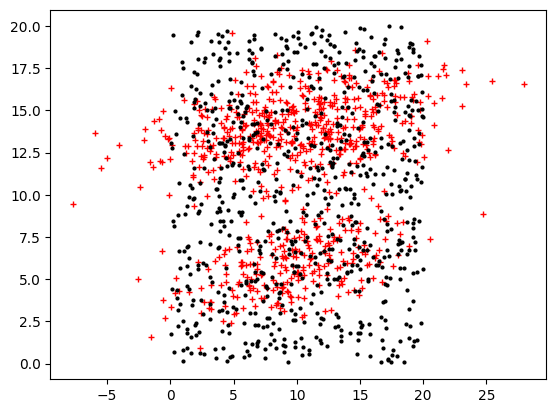

In [25]:
plt.plot(X[:int(N/2), 0], X[:int(N/2),1], 'r+', X[int(N/2):,0],X[int(N/2):,1],'k.', ms=4)

In [26]:
# Training and Test set creation

In [27]:
from sklearn.model_selection import train_test_split

In [31]:
X

array([[12.59080095, 15.50948013],
       [ 8.1537339 , 16.71481051],
       [-0.12696371, 13.36889974],
       ...,
       [17.10881966,  8.27100981],
       [ 4.63522923,  4.47963684],
       [ 7.45080691,  0.31260003]])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=11)

In [33]:
X_train.shape

(1200, 2)

In [34]:
X_test.shape

(300, 2)

In [35]:
X_train[0]

array([ 4.62728194, 15.56260526])

In [36]:
from sklearn import tree

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
maxDepth=[2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

In [39]:
len(maxDepth)

17

In [40]:
trainAcc=np.zeros(len(maxDepth))


In [41]:
trainAcc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [42]:
testAcc=np.zeros(len(maxDepth))

In [60]:
trainAcc = np.zeros(len(maxDepth))

In [61]:
index=0

In [62]:
for depth in maxDepth:
  clf = tree.DecisionTreeClassifier(max_depth=depth)
  clf = clf.fit(X_train, y_train)
  y_predTrain=clf.predict(X_train)
  y_predTest=clf.predict(X_test)
  trainAcc[index]=accuracy_score(y_train, y_predTrain)
  testAcc[index]=accuracy_score(y_test, y_predTest)
  index +=1

In [63]:
testAcc

array([0.62666667, 0.62666667, 0.62666667, 0.66666667, 0.67      ,
       0.67      , 0.68      , 0.65666667, 0.66333333, 0.63666667,
       0.61333333, 0.63      , 0.63      , 0.61666667, 0.62666667,
       0.62      , 0.62666667])

In [65]:
trainAcc

array([0.6275    , 0.66333333, 0.6675    , 0.70583333, 0.73333333,
       0.74833333, 0.77166667, 0.79166667, 0.8175    , 0.91166667,
       0.97      , 0.99083333, 0.99833333, 1.        , 1.        ,
       1.        , 1.        ])

Text(0, 0.5, 'Accuracy')

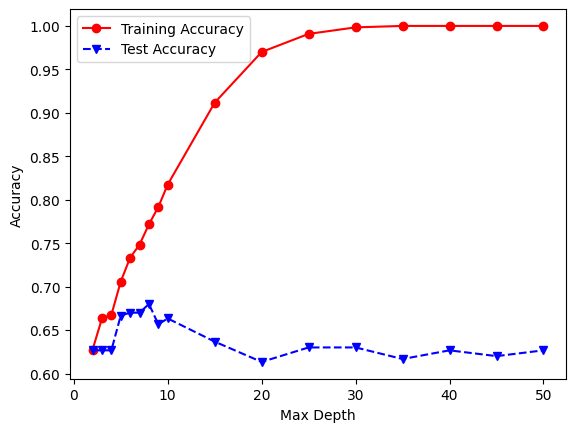

In [66]:
plt.plot(maxDepth, trainAcc, 'ro-', maxDepth, testAcc, 'bv--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

In [67]:
# using x and y values to make a linear regression model

from sklearn.linear_model import LinearRegression

In [68]:
# Create a linear regression model
model = LinearRegression()

In [70]:
# Fit the model to the data
model.fit(X=X_train, y=y_train)

LinearRegression()

In [71]:
# Get the slope and intercept
slope = model.coef_
intercept = model.intercept_

In [72]:
slope

array([-0.00165299,  0.0130497 ])

In [73]:
intercept

0.37551657138991634

In [82]:
predicted = model.predict(X_test)

In [83]:
expected = y_test

In [85]:
for p,e in zip(predicted[::], expected[::]):
  print(f'predicted: {p:.4f}, Expected: {e:.2f}')

predicted: 0.4327, Expected: 0.00
predicted: 0.5575, Expected: 1.00
predicted: 0.5431, Expected: 1.00
predicted: 0.6125, Expected: 0.00
predicted: 0.5222, Expected: 0.00
predicted: 0.3786, Expected: 0.00
predicted: 0.5362, Expected: 1.00
predicted: 0.5501, Expected: 0.00
predicted: 0.5622, Expected: 0.00
predicted: 0.4123, Expected: 1.00
predicted: 0.4087, Expected: 1.00
predicted: 0.5629, Expected: 1.00
predicted: 0.4408, Expected: 1.00
predicted: 0.5495, Expected: 0.00
predicted: 0.4482, Expected: 0.00
predicted: 0.5116, Expected: 1.00
predicted: 0.4299, Expected: 0.00
predicted: 0.5184, Expected: 1.00
predicted: 0.5493, Expected: 1.00
predicted: 0.4186, Expected: 1.00
predicted: 0.5616, Expected: 1.00
predicted: 0.5679, Expected: 1.00
predicted: 0.6117, Expected: 0.00
predicted: 0.4373, Expected: 1.00
predicted: 0.5411, Expected: 0.00
predicted: 0.5465, Expected: 0.00
predicted: 0.4570, Expected: 1.00
predicted: 0.4038, Expected: 1.00
predicted: 0.5364, Expected: 1.00
predicted: 0.4

In [75]:
import matplotlib.pyplot as plt

In [76]:
slope = slope.reshape(-1, 1)
intercept = intercept.reshape(-1, 1)

In [78]:
print(X.shape)
print(y.shape)

(1500, 2)
(1500,)


In [80]:
print(f"Shape of X[:, 0]: {X[:, 0].shape}")
print(f"Shape of y: {y.shape}")

Shape of X[:, 0]: (1500,)
Shape of y: (1500,)


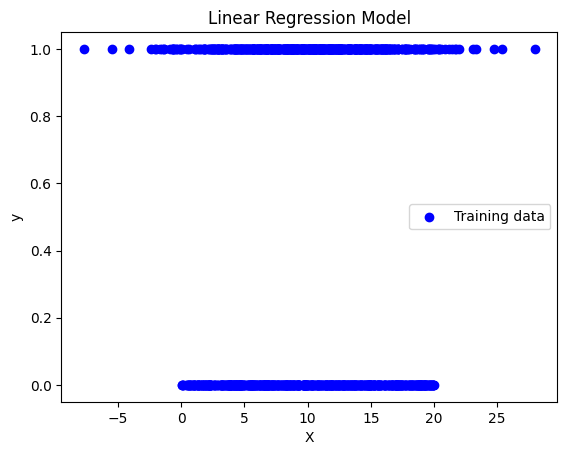

In [112]:
# Create a scatter plot of the training data
plt.scatter(X_train[:, 0], y_train, color='blue', label='Training data')

# Add labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Model')

# Show the plot
plt.legend()
plt.show()
